In [3]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis

In [4]:
cd desktop\python


[WinError 3] The system cannot find the path specified: 'desktop\\python'
C:\Users\user\Desktop\Python\imarticus


In [5]:
cd imarticus

[WinError 2] The system cannot find the file specified: 'imarticus'
C:\Users\user\Desktop\Python\imarticus


In [6]:
yt_data = pd.read_csv('train.csv')

In [7]:
data = pd.DataFrame(yt_data)

In [8]:
data.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978,NaN,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,NaN,NaN
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102,NaN,NaN
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302,NaN,NaN
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374,NaN,NaN


In [9]:
data = data.drop('Unnamed: 17', axis=1)

In [10]:
data = data.drop('Unnamed: 18', axis=1)

In [11]:
data['comment_count'] = data['comment_count'].replace(' ',0)
# as comments are not mentiioned for some of channels so i can assume it as zero

In [12]:
data

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,0,FALSE,FALSE,13342,6089,False,1978978
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,OKR48DOE67,20,EA SPORTS FIFA,3150213.0,FIFA 18 - FUT Champions Cup Barcelona - Day 1,fifa|fifa ultimate team|fut|fifa pack opening|...,Day 1 of the FUT Champions Cup Barcelona featu...,7.0,20,5,0,FALSE,FALSE,9734,5912,False,747960
3194,QJK69DS?91,10,JackWhiteVEVO,261596.0,Jack White - Corporation (Audio),Alternative|Corporation|Jack White|Third Man R...,“Corporation” by Jack White from the forthcomi...,7.0,8,6,0,FALSE,FALSE,16006,12019,True,200410
3195,VHF51NVr11,10,JamesBlakeVEVO,28321.0,James Blake - If The Car Beside You Moves Ahea...,James|Blake|If|The|Car|Beside|You|Moves|Ahead|...,If the car beside you moves ahead \nAs much as...,11.0,15,4,0,FALSE,TRUE,0,0,True,244022
3196,XHU22OAJ39,26,Refinery29,890739.0,Lucie Fink Trains Like A Professional Gymnast ...,refinery29|refinery 29|r29|r29 video|refinery2...,"On this episode of Lucie For Hire, our host Lu...",11.0,14,6,250750,TRUE,FALSE,6859,1247,True,907340


In [13]:
# now i want to categorise videos on the basis of category id

data.columns

Index(['Video_id', 'category_id', 'channel_title', 'subscriber', 'title',
       'tags', 'description', 'Trend_day_count', 'Tag_count',
       'Trend_tag_count', 'comment_count', 'comment_disabled',
       'like dislike disabled', 'likes', 'dislike', 'tag appered in title',
       'views'],
      dtype='object')

In [14]:
data['category_id'].isnull().sum()

6

In [15]:
data['category_id'].unique()

array(['22', '24', '23', '28', '1', '25', '17', '10', '15', '27', '26',
       '2', '19', '20', nan, '29', '“24', '43'], dtype=object)

In [16]:
data[data['category_id'].isna()]
# as we have 6 value which are null and for understanding i put these in category '0' beacause we dont have 0 category

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
187,HCQ73RZo7,NaN,Chicago Sun-Times,11133.0,Obama arrives for jury duty at Daley Center,NaN,Watch former President Barack Obama greet othe...,4.0,10,5,213427,TRUE,FALSE,14535,10728,False,537701
595,NLM1FZ>80,NaN,The Infographics Show,1607518.0,How Likely Are You to Die During a Black Frida...,black friday|black friday sales|How Likely Are...,🐻 Check out our new channel: Fuzzy & Nutz 🐿️ ►...,3.0,25,5,68068,TRUE,TRUE,0,0,True,517759
798,GKQ34HXG87,NaN,The Voice,5850161.0,The Voice 2017 - Team Miley: Man! I Feel Like ...,the voice|the voice nbc|the voice season 13|wa...,"Miley Cyrus joins Ashland Craft, Brooke Simpso...",12.0,14,6,72128,TRUE,FALSE,14302,10959,True,1687526
864,NCX50MJl16,NaN,Trailers Promos Teasers,18000.0,All The Money In The World - TV Spot featuring...,All The Money In The World|Christopher Plummer,All The Money In The World - The story of the ...,4.0,21,2,0,FALSE,FALSE,15068,6486,True,123902
913,HOT6GH>20,NaN,IISuperwomanII,13357328.0,When You Catch Your Boyfriend (ft. Nick Jonas),iisuperwomanii|superwoman|team|super”|super|wo...,That moment when you awkwardly walk in and cat...,7.0,21,6,248173,TRUE,TRUE,0,0,True,3292905
972,HPR67IDa88,NaN,Shoshana Bean,24589.0,Taylor Swift - I Did Something Bad (Cover) | B...,taylor swift|reputation|acoustic|live|soul|pop...,Sho: @shobean\nCynthia: @cynthiaerivo\n\nShot ...,4.0,9,4,203113,TRUE,FALSE,21742,13223,False,580010


In [17]:
data['category_id'] = data['category_id'].fillna(0)

In [18]:
data['category_id'].isnull().sum()

0

In [19]:
data['category_id']=data['category_id'].replace('“24',24)

In [20]:
data['category_id'].unique()

array(['22', '24', '23', '28', '1', '25', '17', '10', '15', '27', '26',
       '2', '19', '20', 0, '29', 24, '43'], dtype=object)

In [21]:
df = data.groupby(['category_id','title','comment_count','likes'])[['views']].sum()

In [22]:
df# this indicating that which video fell in same categorie

views
category_id title                                              comment_count likes         
0           All The Money In The World - TV Spot featuring ... 0             15068   123902
            How Likely Are You to Die During a Black Friday... 68068         0       517759
            Obama arrives for jury duty at Daley Center        213427        14535   537701
            Taylor Swift - I Did Something Bad (Cover) | By... 203113        21742   580010
            The Voice 2017 - Team Miley: Man! I Feel Like a... 72128         14302  1687526
...                                                                                     ...
29          Suicide: Be Here Tomorrow.                         0             0      3429320
            Tell Hollywood to stand with immigrants            170749        16477   455542
            The Obama Presidential Center: Where We Are Now    40004         10245   261921
43          Apple HomePod: Everything to know before you bu... 0             16387   547439
            You're not crazy. Apple is slowing down older i... 0             18903   586832

[3195 rows x 1 columns]

In [23]:
data['category_id'].astype('int')

0       22
1       24
2       23
3       24
4       24
        ..
3193    20
3194    10
3195    10
3196    26
3197    22
Name: category_id, Length: 3198, dtype: int32

In [24]:
pvt = data.pivot_table(values=["likes","views"], index=["category_id","title"], aggfunc = np.sum)

In [73]:
pvt# having table for likes and views on particular title and category id

likes    views
category_id title                                                             
0           All The Money In The World - TV Spot featuring ...  15068   123902
            How Likely Are You to Die During a Black Friday...      0   517759
            Obama arrives for jury duty at Daley Center         14535   537701
            Taylor Swift - I Did Something Bad (Cover) | By...  21742   580010
            The Voice 2017 - Team Miley: Man! I Feel Like a...  14302  1687526
...                                                               ...      ...
29          Suicide: Be Here Tomorrow.                              0  3429320
            Tell Hollywood to stand with immigrants             16477   455542
            The Obama Presidential Center: Where We Are Now     10245   261921
43          Apple HomePod: Everything to know before you bu...  16387   547439
            You're not crazy. Apple is slowing down older i...  18903   586832

[3191 rows x 2 columns]

In [26]:
pvt_sub = data.pivot_table(values = "subscriber", index="channel_title", aggfunc=np.sum)

In [27]:
pvt_sub

,subscriber
channel_title,
12 News,2710.0
1theK (원더케이),47850650.0
20th Century Fox,22081446.0
2CELLOS,3073400.0
3D Printing Nerd,183465.0
...,...
yovo68,40167.0
ТСН,442641.0
ワーナー ブラザース 公式チャンネル,151008.0


In [28]:
data['comment_count'] = data['comment_count'].astype('int') 

In [29]:
import matplotlib.pyplot as plt

In [30]:
import seaborn as sns

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='comment_count'>

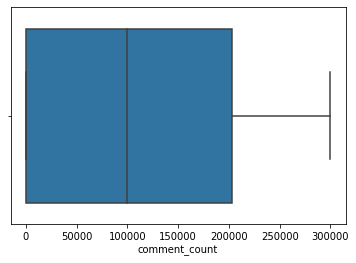

In [31]:
sns.boxplot(data['comment_count'])# it is positive skewness lets check skew as well

In [33]:
data['comment_count'].skew()# skeness for comment_count

0.32715403757702005

In [83]:
kurtosis(data['comment_count'])

-1.3197250097299473

In [34]:
data['tags'] = data['tags'].fillna("NOtags")

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               3198 non-null   object 
 1   category_id            3198 non-null   object 
 2   channel_title          3195 non-null   object 
 3   subscriber             3175 non-null   float64
 4   title                  3195 non-null   object 
 5   tags                   3198 non-null   object 
 6   description            3133 non-null   object 
 7   Trend_day_count        3197 non-null   float64
 8   Tag_count              3197 non-null   object 
 9   Trend_tag_count        3197 non-null   object 
 10  comment_count          3198 non-null   int32  
 11  comment_disabled       3198 non-null   object 
 12  like dislike disabled  3198 non-null   object 
 13  likes                  3198 non-null   object 
 14  dislike                3198 non-null   object 
 15  tag 

In [36]:
data['Tag_count'].str.contains('alissa ashley|alissa ashley makeup|hooded eye makeup|makeup for hooded eyes').sum()

1

In [37]:
data['Tag_count'] = data['Tag_count'].replace('alissa ashley|alissa ashley makeup|hooded eye makeup|makeup for hooded eyes',4)
#AS IT HAVE FOUR TAGS SO I PUT 4 TAG COUNT AT THAT VALUE.

In [38]:
data['Tag_count'].str.contains('alissa ashley|alissa ashley makeup|hooded eye makeup|makeup for hooded eyes').sum()

0

In [39]:
data['Tag_count'] = data['Tag_count'].fillna(0)

In [40]:
data['Tag_count'] = data['Tag_count'].astype('int')

In [41]:
import matplotlib.pyplot as plt

In [42]:
taking_data_of_tag_count = data['Tag_count'].loc[200:300]

In [43]:
taking_data_of_tag_count

200    18
201    24
202    13
203    20
204    20
       ..
296    23
297    18
298     8
299    19
300    24
Name: Tag_count, Length: 101, dtype: int32

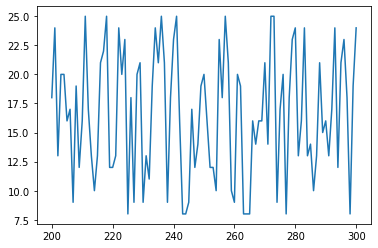

In [44]:
plt.plot(taking_data_of_tag_count)# as we seen from graph Tag_count is varying with time is not stable

In [45]:
data['Tag_count'].skew()# negative skewing is present there means we need more data to find accuracy

39.71473768873629

In [82]:
kurtosis(data['Tag_count'])

1580.5017893033648

In [46]:
data['views'].str.contains('#VALUE!').sum()

1

In [47]:
data['views'] = data['views'].replace("#VALUE!",0)


In [48]:
data['views'] = data['views'].astype('int')

In [49]:
data['dislike'] = data['dislike'].replace('FALSE',0)

In [50]:
data['dislike'] = data['dislike'].astype('int')

In [51]:
data['likes'] = data['likes'].replace([' '], 0)

In [52]:
data['likes'] = data['likes'].astype('int')

In [53]:
data['Trend_tag_count'] = data['Trend_tag_count'].fillna(0)

In [54]:
data['Trend_tag_count'] = data['Trend_tag_count'].replace('>',0)

In [55]:
data['Trend_day_count'] = data['Trend_day_count'].fillna(0)

In [56]:
data['Trend_day_count'] = data['Trend_day_count'].astype('int')

In [57]:
data['subscriber'] = data['subscriber'].fillna(0)

In [58]:
data['subscriber'] = data['subscriber'].astype('int')

In [59]:
data['category_id'] = data['category_id'].astype('int')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Video_id               3198 non-null   object
 1   category_id            3198 non-null   int32 
 2   channel_title          3195 non-null   object
 3   subscriber             3198 non-null   int32 
 4   title                  3195 non-null   object
 5   tags                   3198 non-null   object
 6   description            3133 non-null   object
 7   Trend_day_count        3198 non-null   int32 
 8   Tag_count              3198 non-null   int32 
 9   Trend_tag_count        3198 non-null   object
 10  comment_count          3198 non-null   int32 
 11  comment_disabled       3198 non-null   object
 12  like dislike disabled  3198 non-null   object
 13  likes                  3198 non-null   int32 
 14  dislike                3198 non-null   int32 
 15  tag appered in title 

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='subscriber', ylabel='Density'>

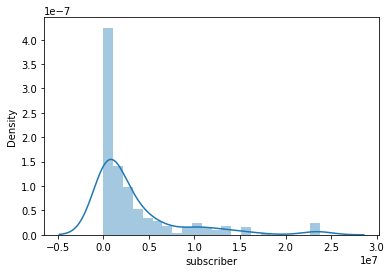

In [61]:
sns.distplot(data['subscriber'].loc[200:500])

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='views', ylabel='Density'>

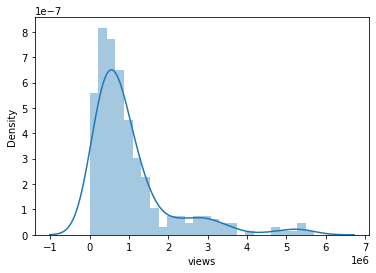

In [62]:
sns.distplot(data['views'].loc[200:500])

<AxesSubplot:xlabel='comment_count', ylabel='likes'>

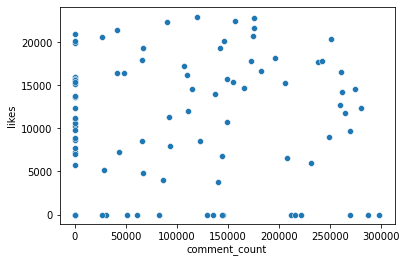

In [63]:
sns.scatterplot(x = data['comment_count'].loc[200:300], y = data['likes'].loc[200:300]) 
# it varies with different values and this graph is between comment and likes per video and it varies with content of video
#may be a good video has more comments comparteively bad one

<AxesSubplot:xlabel='Trend_day_count', ylabel='Tag_count'>

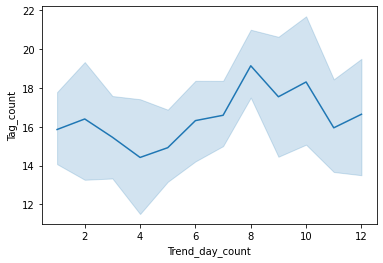

In [64]:
sns.lineplot(x = data['Trend_day_count'].loc[200:400], y = data['Tag_count'].loc[200:400])
#below graph shows as trending day increases the the tag count also slightly increasing

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='category_id', ylabel='count'>

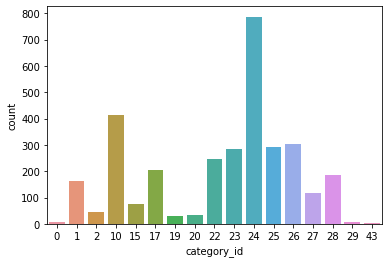

In [65]:
sns.countplot(data['category_id'])
# this graph show hoe many video in one category, 24 category is max 

<AxesSubplot:xlabel='subscriber', ylabel='channel_title'>

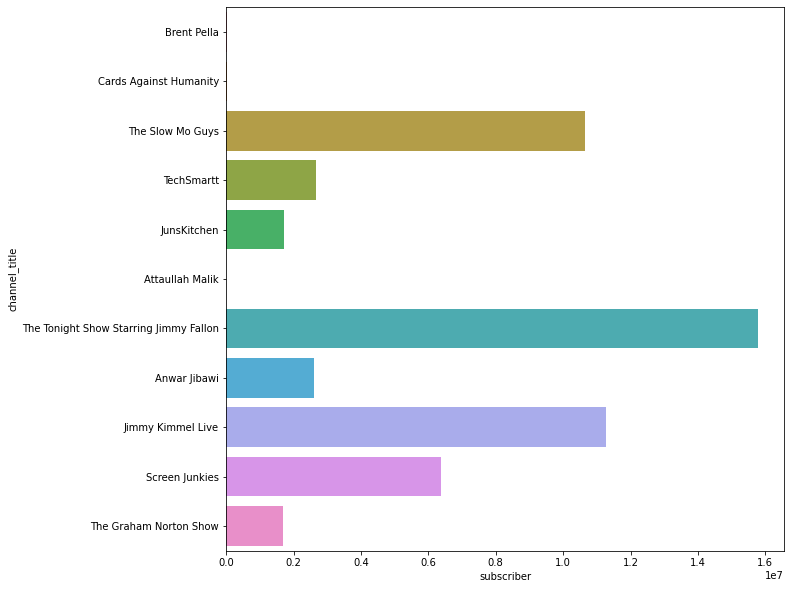

In [66]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(10,10))
sns.barplot(x = data['subscriber'].loc[200:210], y = data['channel_title'].loc[200:210])

#this grapdh shows how many subscriber per channel

In [67]:
data.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
0,HDR9SQc79,22,CaseyNeistat,9086142,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6,21,6,0,FALSE,FALSE,13342,6089,False,1978978
1,KNH52UF?48,24,LastWeekTonight,5937292,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1,23,1,116266,TRUE,FALSE,5761,3044,False,1487870
2,QTW28IRG36,23,Rudy Mancuso,4191209,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10,22,3,257850,TRUE,TRUE,0,0,True,1502102
3,MGL76WI]26,24,Good Mythical Morning,13186408,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12,17,5,263939,TRUE,TRUE,0,0,True,3519302
4,TWP93KXT70,24,nigahiga,20563106,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11,15,7,268085,TRUE,TRUE,0,0,True,4835374


           channel_title  subsciber  likes
0           CaseyNeistat          1      2
1        LastWeekTonight          2      4
2           Rudy Mancuso          3      6
3  Good Mythical Morning          4      8
4               nigahiga          5     10
5               iJustine          6     12
6    Saturday Night Live          7     14
7     CrazyRussianHacker          8     16


<AxesSubplot:xlabel='channel_title'>

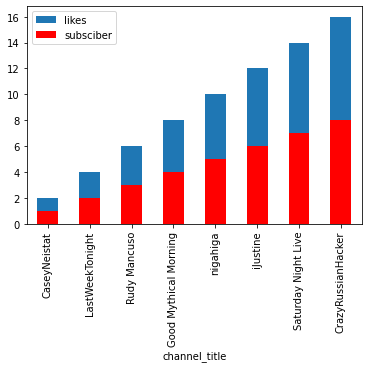

In [68]:
import matplotlib.pyplot as lib
import pandas as pd
dict1 = {
    'channel_title' : ['CaseyNeistat', 'LastWeekTonight', 'Rudy Mancuso', 'Good Mythical Morning', 'nigahiga', 'iJustine', 'Saturday Night Live', 'CrazyRussianHacker'],
    'subsciber' : [1, 2, 3, 4, 5, 6, 7, 8],
    'likes' : [2, 4, 6, 8, 10, 12, 14, 16]
}
table1 = pd.DataFrame(dict1)
print(table1)
ax = lib.gca()
table1.plot(kind = 'bar', x = 'channel_title', y = 'likes', ax = ax)  #getting the comparison with the two data
table1.plot(kind = 'bar', x = 'channel_title', y = 'subsciber', color = 'red', ax = ax)

In [72]:
data['subscriber'].max()# maximum subsriber reached till date.. on a youtube

1576229455

In [74]:
data.describe()

,category_id,subscriber,Trend_day_count,Tag_count,comment_count,likes,dislike,views
count,3198.000000,3.198000e+03,3198.000000,3198.000000,3198.000000,3.198000e+03,3198.000000,3.198000e+03
mean,20.322076,3.796479e+06,7.961851,18.610381,112487.494371,9.763094e+03,5782.877423,1.571630e+06
std,7.379694,2.855627e+07,78.543895,80.355273,101861.271626,2.240396e+04,4861.070612,2.053533e+07
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,2.326040e+05,4.000000,12.000000,0.000000,0.000000e+00,0.000000,4.304118e+05
50%,24.000000,1.206997e+06,7.000000,17.000000,99582.000000,1.022150e+04,5351.500000,7.080920e+05
75%,25.000000,3.808198e+06,10.000000,21.000000,203208.250000,1.505300e+04,10040.250000,1.204446e+06
max,43.000000,1.576229e+09,4444.000000,3225.000000,299877.000000,1.213628e+06,14858.000000,9.898735e+08


In [76]:
data['subscriber'].idxmax()# finding where it is max subscriber and it will gave row number

1562

In [79]:
data.loc[[1562]] # this where we get max subcriber for channel

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
1562,TPH92WV\45,23,The Tonight Show Starring Jimmy Fallon,1576229455,Alison Brie's GLOW Co-Stars Freaked Out Over H...,The Tonight Show|Jimmy Fallon|Alison Brie|GLOW...,Alison Brie chats about her Golden Globes nomi...,10,18,6,118359,TRUE,TRUE,0,0,True,3558846


In [80]:
data['views'].idxmax()

29

In [81]:
data.loc[[29]]# where there is max views

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
29,ZUW72GLK1,1,FaeryInLoveInc,44,Nick Andopolis: Drummer,freaks and geeks|jason segel|judd apatow|drums...,"The opening of Freaks and Geeks Episode 6, I'm...",12,21,1,273491,TRUE,TRUE,0,0,True,989873537


<AxesSubplot:>

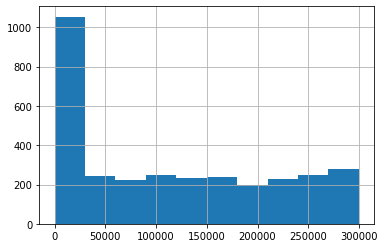

In [84]:
data.comment_count.hist()

In [85]:
#above graph shows highest the comment rate more will be the trending video

In [86]:
data['dislike'].idxmax()

1091

In [87]:
data.loc[[1091]]# most disliked content

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
1091,QQY15LPG28,17,ESPN,2702088,Urban Meyer reacts to Ohio State not making th...,espn|espn live|CFP|College Football Playoff|Oh...,Head football coach Urban Meyer reacts to the ...,6,13,1,291981,TRUE,FALSE,16946,14858,True,1307840


<AxesSubplot:xlabel='comment_count', ylabel='dislike'>

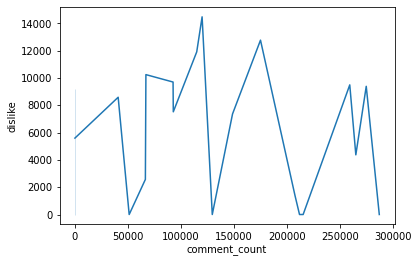

In [96]:
sns.lineplot(x = data['comment_count'].loc[200:220], y = data['dislike'].loc[200:220])

In [97]:
#upper trend shows how dislike and comment_count relate each other.....
#in come cases user want to share how you can improve your video so that in that cases we have more dislikes and more comment
#in some cases user doesn't want to tell any thinh he/she simply dislike.. in tat cases we have more dislikes then comment_count